In [16]:
import requests
import tarfile
import os
import numpy as np
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from models import defineGenerator
from image_sequence_gen import ImageSequenceGenerator
from fake_attribute_sequence_generator import FakeAttributeSequenceGenerator

In [18]:
ds= tfds.load('celeb_a', data_dir=".", download=False)
ds_examples = ds["test"].take(16)

modelGen = defineGenerator(41, 64)

# import generator
modelGen.compile(loss='mse',
                  optimizer=Adam(1e-4, beta_1=0.5, decay=0.00005),
                  metrics=['mse'])
dataGen = ImageSequenceGenerator(ds["train"], 32, modelGen)


True
True
(64, 1)
[0.         0.         0.         0.         0.         1.
 0.         0.         0.         1.         1.         0.
 1.         0.         1.         0.         1.         1.
 0.         1.         1.         0.         0.         0.
 0.         1.         1.         1.         1.         0.
 0.         0.         1.         0.         1.         1.
 1.         1.         1.         0.         0.55400308]
[0]


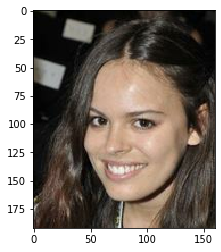

[[[ 1.16779511e-05 -6.73548948e-06 -1.84759683e-05]
  [ 6.04685283e-06  1.26965315e-05 -1.53829751e-06]
  [ 1.83395441e-05  9.72425823e-06  1.97035661e-07]
  ...
  [-4.91362734e-05 -2.55149971e-05 -8.41891742e-05]
  [ 2.02687879e-05  1.54522932e-04  1.23202844e-05]
  [ 1.61086427e-06 -1.05537962e-04 -4.71827952e-05]]

 [[-4.50339539e-05  3.31841948e-05  2.44286639e-05]
  [-2.12696541e-05 -3.44075670e-05  1.43677316e-05]
  [-1.22140600e-05 -1.42197987e-05 -6.54125415e-06]
  ...
  [-2.91383418e-04  1.04154948e-04  9.57730444e-05]
  [-1.02408987e-04 -2.02769370e-05 -4.09676431e-05]
  [-1.78464034e-04  1.16377960e-05 -6.41394872e-05]]

 [[-5.97867620e-06 -3.51201161e-05 -4.23479942e-05]
  [-8.21694721e-06 -2.45327374e-05 -1.51745608e-05]
  [ 6.01009924e-05  9.80642108e-06  1.27785997e-05]
  ...
  [-1.22035948e-04  1.47433559e-04  4.60765295e-05]
  [-1.87506987e-04  7.68345490e-06 -2.50316043e-06]
  [-2.82659876e-05  9.45735737e-05 -1.75970301e-04]]

 ...

 [[ 1.45998638e-06  5.48073513e-05

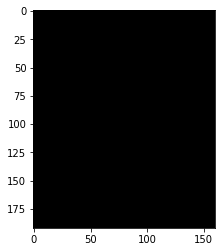

In [19]:
#The batch of images
print(dataGen[10][0].shape == (32,192,160,3))

# The batch of 1s and 0s describing if the corresponding image is real or fake
print(dataGen[10][1].shape == (32,1))

fakeData = FakeAttributeSequenceGenerator()

#print shape of saachi's part
print(fakeData[0][1].shape)

#Print example of both parts
print(fakeData[0][0][0])
print(fakeData[0][1][0])

#print 2 images from seans code
plt.imshow(dataGen[0][0][0])
plt.show()
plt.imshow(dataGen[0][0][16])
plt.show()

